# Getting your hands dirty with LDA (Using the Foursquare API)

First things first, we want to develop a classifier that can detect if a user comment is misapplied to the venue. Think of all the times you've gone to an Amazon item and saw reviews that looked like the image below, "Used but in very good condition", "fast shipping" are these relevant to a product review? Or are they more appropriate for seller reviews? 

We're going to see if we can develop a comment classifier to detect which kinds of comments may be more appropriate for which venue type, and thus provide some indication on the "appropriateness" of the comment that can be used for further review, thus (we hope), improving the overall quality of Foursquare as a reviews platform

How do we plan on doing this? First, this lab will finally utilize a multi-class target. In this case, our goal will be to link comments we've extracted from Foursquare to store category type. 

As an example: "This place got me drunk" would be a comment you'd expect to see for a store category "bar" 
Yet, "I want to have my wedding here" is definitely not a comment you'd expect to see at a "bar" category (lest you live in Boston), more likely you'd see such a category associated with a park, or other such venue. 

The motivation for this exercise came from Amazon. Notice in the picture below, you see some comments that are speaking about the "condition" of the DVD and not the quality of the movie. These are an example of misapplied comments. I'm not promising our classifier will be this exact, but what we'll be doing is a big step in that direction. Excited? Good! Let's go!


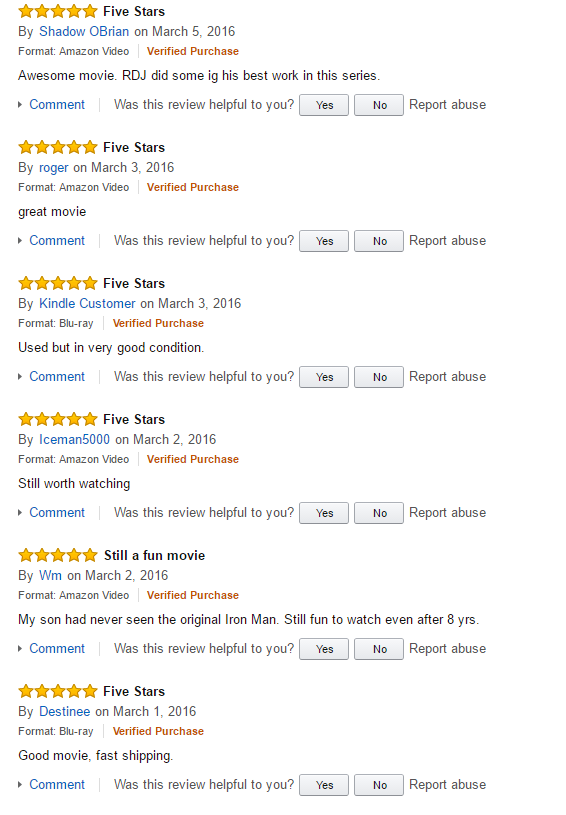

In [82]:
from IPython.display import Image
Image('F:/test/Bad Amazon Reviews.PNG')

Use the previously built table-creator on a few categories of Foursquare venues. 

Find the category list code in the following page: https://developer.foursquare.com/categorytree

In [1]:
import foursquare
import json
import pandas as pd
import unicodedata


#ACCESS_TOKEN = ""
#client = foursquare.Foursquare(access_token=ACCESS_TOKEN)



Load up the data we used previously, and use your scraper code to build your Foursquare table. We're going to do something a little different here. First, go into the category list https://developer.foursquare.com/categorytree and a category that will give you an at least 4 - 6 different store categories. You can experiment by inputting the categoryid into the starting list generator and then running the scraper code, then 'eye-balling' the store category section to see there are at least 4 - 6 different categories. 

If the category you selected does not have enough categories, you may have to either pick another, pull in multiple categories or merge.


In [2]:
# I just re-run the table maker once I change the category id for the 2nd category code

# Note: Sports bar : 4bf58dd8d48988d11d941735
# Note: Seafood Rest.: 4bf58dd8d48988d1ce941735
# Note: Winery : 4bf58dd8d48988d14b941735
# Note: Liquor Store : 4bf58dd8d48988d186941735


# change the categoryid for each type and define 


In [3]:
# Solution, note this is my specific scraper , could look different, but will generally be a two for loop nested process



> Note to the instructor : This like the foursquare lab can be fairly open ended. You'll need to be watchful of people who can get stuck in the beginning. I've tried to streamline the process as the lab progresses, but there will definitly be a lot more improvising in this lab vis-a-vis the others this week

In [30]:
# This code is commented for the instructor to show what a multiple table merge may look like:

#venue_table_1 = venue_table.drop_duplicates(); 
#venue_table_2 = venue_table.drop_duplicates(); 
#venue_table_3 = venue_table.drop_duplicates(); 
#venue_table_4 = venue_table.drop_duplicates(); 
#venue_table_5 = venue_table.drop_duplicates(); 
#len(venue_table_no_dupe)
#len(venue_table_2)


Be sure to remove all duplicates, and merge all your dataframes into one data frame for analysis 



# Constructing features using string parsing and elementary text mining

Create a normalizer function that will take the comments, lowercase all uppercase letters, split each comment into an array/list/vector of words, and remove stop words. 

In [298]:
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
import mpld3            
import numpy as np

stopwords = nltk.corpus.stopwords.words('english')

Write a normalizing method, one that will convert all letters in a string into lower case, and remove stopwords. 

A helpful references: https://docs.python.org/2/library/re.html

> Instructor: I'm not sure how much regex is taught in previous weeks. But this may be a good example of a code you may want to walk them through manually if they are ill-prepared for text-mining and/or NLP. 

Test out your normalizer on a comment to ensure it's working. 

Use the normalizer that you created to build a 'stripped' down comments array/vector/list (however you did it)

Vectorize your feature set into a dense matrix representation using Countvectorizer from sklearn

A helpful reference: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [4]:
from sklearn.feature_extraction.text import CountVectorizer



# Performing the LDA

Construct your LDA with the pieces above by fitting the model to your feature set and target

In [5]:
import scipy



>To the instructor : There is a risk that for whatever reason one of your students may produce a set of data so lacking in discrimination, that the procedure below may only produce onooe column of data (and hence you won't be able to to build a bi-variate graph since each column represents a dimension). This is very rare, most of the random sampling of data I went through had enough variation to create at least 2 dimensions. But it at least happened to me once. Again, I believe the procedure hinges on finding the numerical approx. of the inverse matrix, if it can't do this up-to whatever machine epsilon is specified in the back-end code, it will only produce the one column.  

In [6]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA


# Visualizing Results

Now print the LDA and at least a few of the categories on a 2-D discriminant chart. Do you think the method is seperating the categories very well? Should we tune it more? Would it be a good indicator of "inappropriate commenting"? 

In [7]:
import matplotlib.pyplot as plt

